**Udo Mary Imeabasi, WTF/2025/3304, udomary963@outlook.com**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
retails = pd.read_excel("/online_retail_customer_churn.xlsx")
retails

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False
996,997,19,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True
997,998,47,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False
998,999,23,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True


In [ ]:
# 1) What is the shape of the dataset (rows and columns)

retails.shape

(1000, 15)

In [ ]:
# and what does each column represent?

retails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Annual_Income               1000 non-null   float64
 4   Total_Spend                 1000 non-null   float64
 5   Years_as_Customer           1000 non-null   int64  
 6   Num_of_Purchases            1000 non-null   int64  
 7   Average_Transaction_Amount  1000 non-null   float64
 8   Num_of_Returns              1000 non-null   int64  
 9   Num_of_Support_Contacts     1000 non-null   int64  
 10  Satisfaction_Score          1000 non-null   int64  
 11  Last_Purchase_Days_Ago      1000 non-null   int64  
 12  Email_Opt_In                1000 non-null   bool   
 13  Promotion_Response          1000 n

In [ ]:
# 2) Are there any missing values in the dataset? If yes, which
# columns are affected, and how many missing values do they have?

retails.isnull().sum()

# No missing value

,0
Customer_ID,0
Age,0
Gender,0
Annual_Income,0
Total_Spend,0
Years_as_Customer,0
Num_of_Purchases,0
Average_Transaction_Amount,0
Num_of_Returns,0
Num_of_Support_Contacts,0


In [ ]:
# 3) Check the data types of each column.
# Are any columns incorrectly typed (e.g., numeric stored as object)?

retails.dtypes

# No data type is stored wrongly

,0
Customer_ID,int64
Age,int64
Gender,object
Annual_Income,float64
Total_Spend,float64
Years_as_Customer,int64
Num_of_Purchases,int64
Average_Transaction_Amount,float64
Num_of_Returns,int64
Num_of_Support_Contacts,int64


In [ ]:
# 4) Are there any duplicate customer records?
# If so, how many and how would you handle them?

retails.duplicated().sum()

# No duplicate value

np.int64(0)

In [ ]:
# 5) What are the mean, median, and standard deviation
# for Age, Annual_Income, and Total_Spend?
# What do these statistics tell you about the customers?

retails[['Age', 'Annual_Income', 'Total_Spend']].agg(['mean', 'median', 'std'])

,Age,Annual_Income,Total_Spend
mean,43.267000,111.962960,5080.79265
median,43.000000,114.140000,4986.19500
std,15.242311,52.844111,2862.12335


In [ ]:
# 6) Which customers fall into the highest and lowest 10% of
# Total_Spend? How do they differ from the rest?

low_10 = retails['Total_Spend'].quantile(0.1)
high_10 = retails['Total_Spend'].quantile(0.9)

top_10_customers = retails[retails['Total_Spend'] >= high_10][
    ['Customer_ID', 'Total_Spend']
]
bottom_10_customers = retails[retails['Total_Spend'] <= low_10][
    ['Customer_ID', 'Total_Spend']
]
top_10_customers

# High spending customers

,Customer_ID,Total_Spend
3,4,9110.30
9,10,9803.57
22,23,9116.18
28,29,9811.70
36,37,9905.49
...,...,...
976,977,9702.12
977,978,9872.14
979,980,9562.24
982,983,9444.26


In [ ]:
bottom_10_customers

# Low spending customers

,Customer_ID,Total_Spend
2,3,618.83
5,6,255.19
27,28,1000.60
51,52,1072.67
54,55,935.94
...,...,...
980,981,560.73
981,982,375.85
994,995,117.20
995,996,1089.09


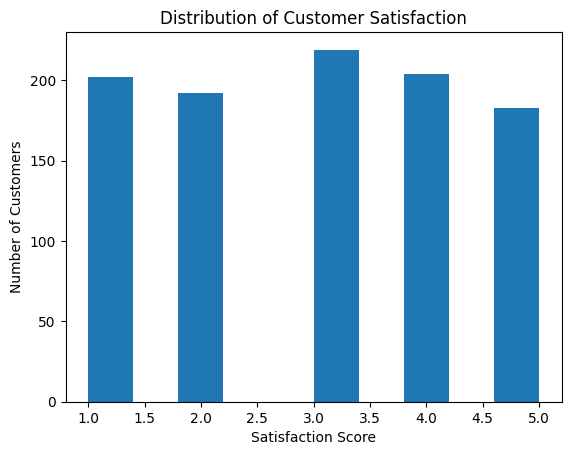

In [ ]:
# 7) How is customer satisfaction distributed?
# Plot it and describe any patterns you observe.

plt.hist(retails['Satisfaction_Score'], bins=10)
plt.xlabel('Satisfaction Score')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Satisfaction')
plt.show()

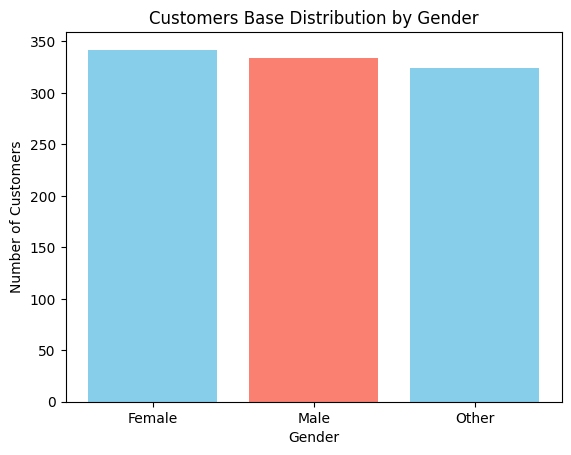

In [ ]:
# 8) How is the customer base distributed across Gender?
# Visualise the distribution.

gender_counts = retails['Gender'].value_counts()

plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'salmon'])
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Customers Base Distribution by Gender')
plt.show()

In [ ]:
# 9) Does churn (Target_Churn) vary by gender?
# Calculate churn rate per gender and visualize it.

churn_by_gender = retails.groupby('Gender')['Target_Churn'].mean()
churn_by_gender

,Target_Churn
Gender,
Female,0.523392
Male,0.505988
Other,0.549383


In [ ]:
# Converting churn rate to a percentage

churn_by_gender_percent = churn_by_gender * 100
churn_by_gender_percent

,Target_Churn
Gender,
Female,52.339181
Male,50.598802
Other,54.938272


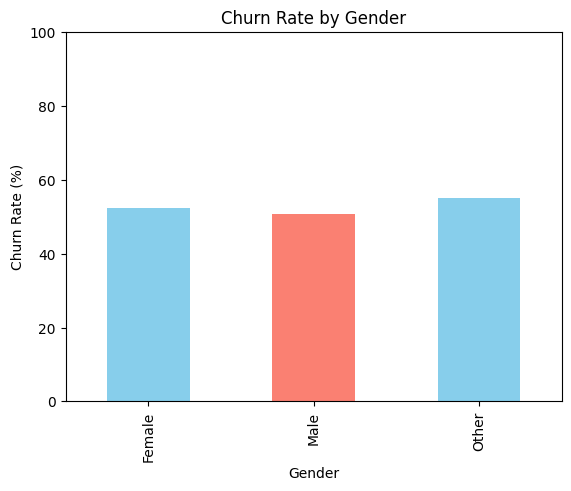

In [ ]:
churn_by_gender_percent.plot(kind='bar', color=['skyblue', 'salmon'])
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Gender')
plt.ylim(0, 100)
plt.show()

In [ ]:
# 10) How do customers respond to promotions (Promotion_Response),
# and which response type is most common?

promotion_response_counts = retails['Promotion_Response'].value_counts()
promotion_response_counts

# Unsubscribed is most common type of response

,count
Promotion_Response,
Unsubscribed,361
Responded,338
Ignored,301


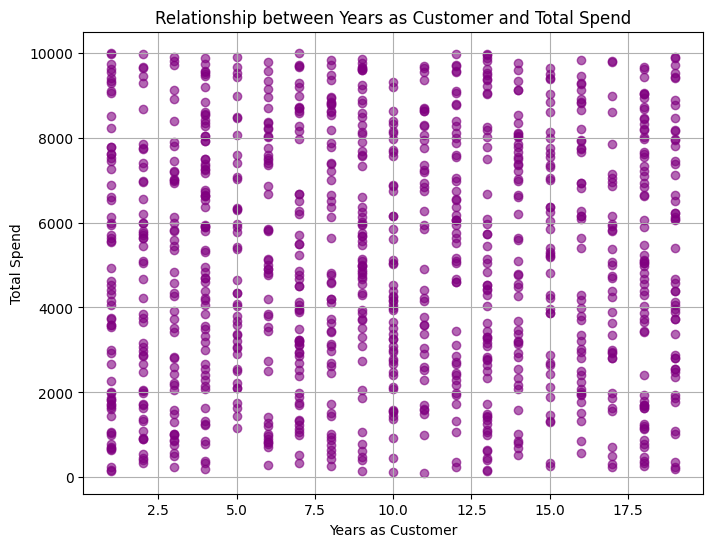

In [ ]:
# 11) What is the relationship between Years_as_Customer and
# Total_Spend? Create a scatter plot and describe the trend.

plt.figure(figsize=(8, 6))
plt.scatter(retails['Years_as_Customer'], retails['Total_Spend'], alpha=0.6, color='purple')
plt.xlabel('Years as Customer')
plt.ylabel('Total Spend')
plt.title('Relationship between Years as Customer and Total Spend')
plt.grid(True)
plt.show()

In [ ]:
# 12) Do customers with higher Num_of_Purchases generally have
# higher Total_Spend? Quantify and visualise this relationship.

correlation = retails['Num_of_Purchases'].corr(retails['Total_Spend'])
print(f"Correlation between number of purchases and total spend: {correlation:.2f}")

Correlation between number of purchases and total spend: 0.05


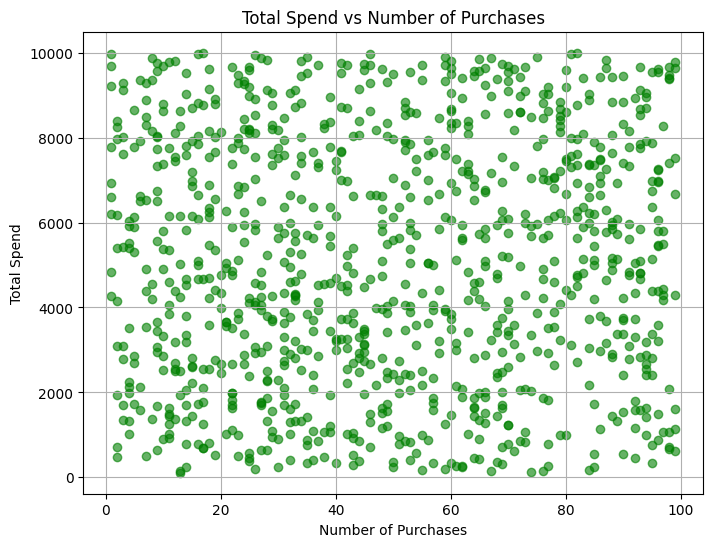

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(retails['Num_of_Purchases'], retails['Total_Spend'], alpha=0.6, color='green')
plt.xlabel('Number of Purchases')
plt.ylabel('Total Spend')
plt.title('Total Spend vs Number of Purchases')
plt.grid(True)
plt.show()

In [ ]:
retails.isnull().sum()

,0
Customer_ID,0
Age,0
Gender,0
Annual_Income,0
Total_Spend,0
Years_as_Customer,0
Num_of_Purchases,0
Average_Transaction_Amount,0
Num_of_Returns,0
Num_of_Support_Contacts,0


In [ ]:
# 13) How does Email_Opt_In status relate to churn?

retails.groupby('Email_Opt_In')['Target_Churn'].agg(['count', 'mean'])

,count,mean
Email_Opt_In,,
False,471,0.526539
True,529,0.525520


In [ ]:
# Compare churn rates between opt-in and non–opt-in customers.

churn_by_optin = retails.groupby('Email_Opt_In')['Target_Churn'].mean() * 100
churn_by_optin

,Target_Churn
Email_Opt_In,
False,52.653928
True,52.551985


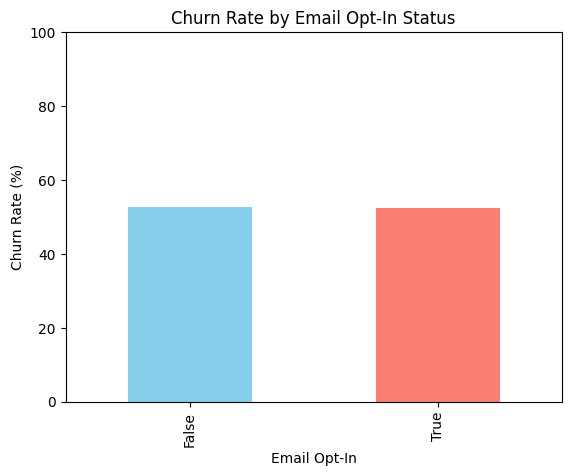

In [ ]:
churn_by_optin.plot(kind='bar', color=['skyblue', 'salmon'])
plt.ylabel('Churn Rate (%)')
plt.xlabel('Email Opt-In')
plt.title('Churn Rate by Email Opt-In Status')
plt.ylim(0, 100)
plt.show()